In [4]:
import pandas as pd
import numpy as np

%matplotlib inline

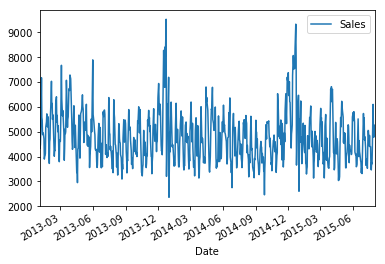

In [5]:

import pandas as pd
# Load the data and set the DateTime index
data = pd.read_csv('../dataset/rossmann.csv', skipinitialspace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Filter to Store 1
store1_data = data[data.Store == 1]

# Filter to open days
store1_open_data = store1_data[store1_data.Open==1]

# Plot the sales over time
store1_open_data[['Sales']].plot()

In [11]:
print store1_data.Sales.autocorr(lag=1) # -0.12
print store1_data.Sales.autocorr(lag=2) # -0.03

print 'New Set'

### this code seems to be doing something incorrect ###
for i in range(1,10):
    print store1_data.Sales.autocorr(lag=i)
    

-0.127325143391
-0.0347871557079
New Set
-0.127325143391
-0.0347871557079
0.064736112913
-0.00181144791099
-0.109457935289
-0.229639355765
0.630719243284
-0.242483722508
-0.150189713924


/anaconda/envs/py27_ds_dt_13/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  app.launch_new_instance()


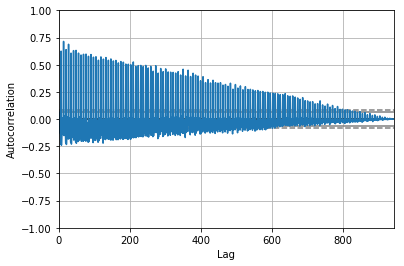

In [9]:
%matplotlib inline
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(store1_data.Sales)


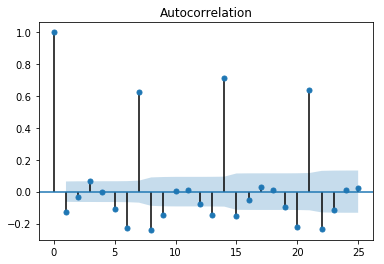

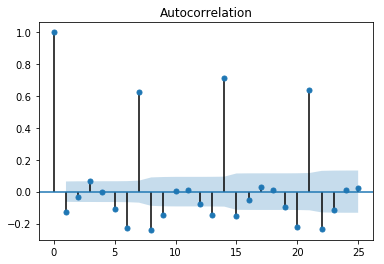

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(store1_data.Sales, lags=25)

In [19]:
from statsmodels.tsa.arima_model import ARMA

store1_sales_data = store1_open_data[['Sales']].astype(float)
model = ARMA(store1_sales_data, (2, 0)).fit()  # This is essentially a AR model becoz q is 0
model.summary() # AR is able to predict the longer/larger trends. It can't account for sharp and spurious spikes/dips
# AR doesn't account for Seasonality as well. For that we need a Moving Average Model

## Since the coeffiecient here is not the same as the autocorr lag1 , therefore the assumptions that I started out 
## with to do the derivation. Therefore it's not a stationary dataset 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(2, 2)   Log Likelihood               -6243.725
Method:                       css-mle   S.D. of innovations            716.957
Date:                Thu, 22 Jun 2017   AIC                          12499.449
Time:                        21:10:41   BIC                          12527.413
Sample:                    07-31-2015   HQIC                         12510.204
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4760.6892     75.651     62.929      0.000    4612.415    4908.963
ar.L1.Sales    -0.2277      0.056     -4.064      0.000      -0.338      -0.118
ar.L2.Sales     0.4689      0.057      8.271      0.000       0.358       0.580
ma.L1.Sales     0.9626      0.062     15.638      0.000       0.842       1.083
ma.L2.Sales     0.2797      0.061      4.613      0.000       0.161       0.399
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2376           +0.0000j            1.2376            0.5000
AR.2            1.7233           +0.0000j            1.7233            0.0000
MA.1           -1.7208           -0.7837j            1.8908           -0.4320
MA.2           -1.7208           +0.7837j            1.8908            0.4320
-----------------------------------------------------------------------------
"""

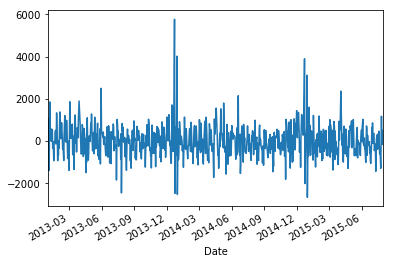

In [17]:
model.resid.plot()

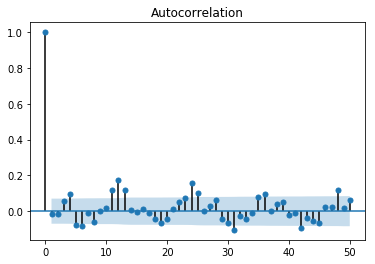

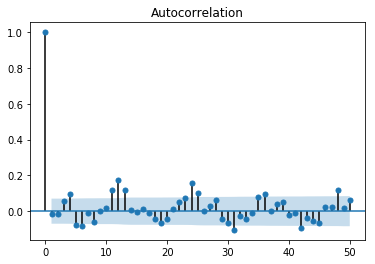

In [20]:
plot_acf(model.resid, lags=50)  ## Ideally we want small randomly distributed residuals. There shouldn't be a pattern
# for residuals

In [22]:
from statsmodels.tsa.arima_model import ARMA

store1_sales_data = store1_open_data[['Sales']].astype(float)
model = ARMA(store1_sales_data, (1, 1)).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 1)   Log Likelihood               -6267.111
Method:                       css-mle   S.D. of innovations            738.876
Date:                Thu, 22 Jun 2017   AIC                          12542.222
Time:                        21:16:21   BIC                          12560.865
Sample:                    07-31-2015   HQIC                         12549.392
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4762.8111     84.702     56.230      0.000    4596.798    4928.825
ar.L1.Sales     0.6979      0.035     20.095      0.000       0.630       0.766
ma.L1.Sales    -0.0294      0.045     -0.654      0.514      -0.118       0.059
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4328           +0.0000j            1.4328            0.0000
MA.1           34.0021           +0.0000j           34.0021            0.0000
-----------------------------------------------------------------------------
"""

In [24]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(store1_sales_data, (1, 0, 1)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 1)   Log Likelihood               -6267.111
Method:                       css-mle   S.D. of innovations            738.876
Date:                Thu, 22 Jun 2017   AIC                          12542.222
Time:                        21:18:34   BIC                          12560.865
Sample:                    07-31-2015   HQIC                         12549.392
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4762.8111     84.702     56.230      0.000    4596.798    4928.825
ar.L1.Sales     0.6979      0.035     20.095      0.000       0.630       0.766
ma.L1.Sales    -0.0294      0.045     -0.654      0.514      -0.118       0.059
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4328           +0.0000j            1.4328            0.0000
MA.1           34.0021           +0.0000j           34.0021            0.0000
-----------------------------------------------------------------------------
"""

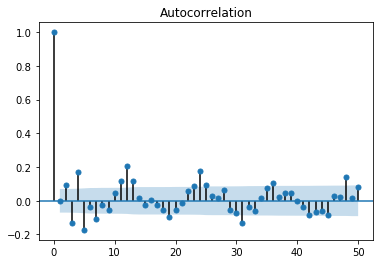

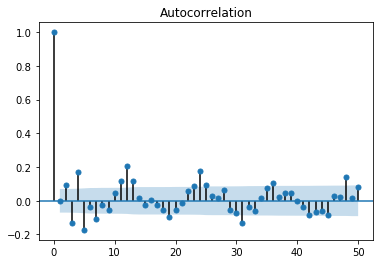

In [23]:
plot_acf(model.resid, lags=50)

In [25]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(store1_sales_data, (1, 0, 1)).fit()
model.summary()
### This is same as ARMA model as the the diff is 0

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 1)   Log Likelihood               -6267.111
Method:                       css-mle   S.D. of innovations            738.876
Date:                Thu, 22 Jun 2017   AIC                          12542.222
Time:                        21:19:09   BIC                          12560.865
Sample:                    07-31-2015   HQIC                         12549.392
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4762.8111     84.702     56.230      0.000    4596.798    4928.825
ar.L1.Sales     0.6979      0.035     20.095      0.000       0.630       0.766
ma.L1.Sales    -0.0294      0.045     -0.654      0.514      -0.118       0.059
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4328           +0.0000j            1.4328            0.0000
MA.1           34.0021           +0.0000j           34.0021            0.0000
-----------------------------------------------------------------------------
"""

In [27]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(store1_sales_data, (1, 1, 0)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  780
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -6313.616
Method:                       css-mle   S.D. of innovations            792.680
Date:                Thu, 22 Jun 2017   AIC                          12633.233
Time:                        21:23:30   BIC                          12647.211
Sample:                    07-30-2015   HQIC                         12638.609
                         - 01-02-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2161     24.028      0.009      0.993     -46.877      47.309
ar.L1.D.Sales    -0.1815      0.035     -5.150      0.000      -0.251      -0.112
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.5103           +0.0000j            5.5103            0.5000
-----------------------------------------------------------------------------
"""

In [29]:
store1_sales_data.Sales.diff(1).autocorr(1) #-0.181
#store1_sales_data.Sales.diff(1).plot()

-0.18144101447610664

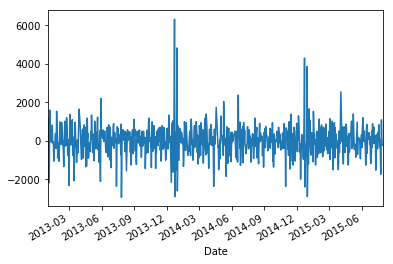

In [30]:
store1_sales_data.Sales.diff(1).plot()

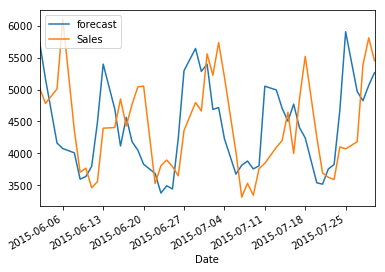

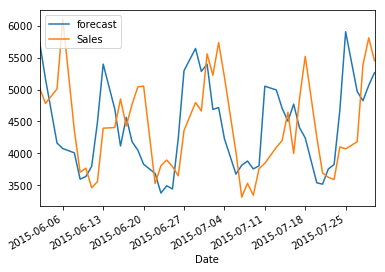

In [34]:
model.plot_predict(1,50)  ### There is a one day shift in the prediction that needs to get fixed

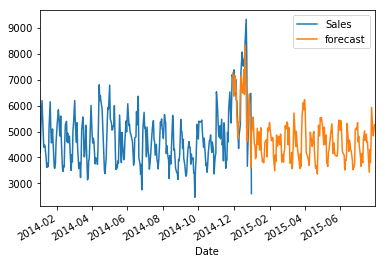

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = store1_sales_data['2014'].plot(ax=ax)

fig = model.plot_predict(1,200, ax=ax, plot_insample=False)

In [41]:
model = ARIMA(store1_sales_data, (7, 1, 2)).fit()
model.summary()

plot_acf(model.resid, lags=50)
model.resid.plot()  ### Look into this error later 

ValueError: ordinal must be >= 1

ValueError: ordinal must be >= 1

### Walmart Sales Data

For the independent practice, we will analyze the weekly sales data from Walmart over a two year period from 2010 to 2012.

The data is again separated by store and by department, but we will focus on analyzing one store for simplicity.

The data includes:

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week


#### Loading the data and setting the DateTimeIndex

In [3]:
data = pd.read_csv('../../assets/dataset/train.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


#### Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store.

In [ ]:
# TODO

#### Plot the rolling_mean for `Weekly_Sales`. What general trends do you observe?

In [ ]:
# TODO

#### Compute the 1, 2, 52 autocorrelations for `Weekly_Sales` and/or create an autocorrelation plot.

In [ ]:
# TODO

In [ ]:
# TODO

In [ ]:
# TODO

#### Split the weekly sales data in a training and test set - using 75% of the data for training

In [ ]:
# TODO

#### Create an AR(1) model on the training data and compute the mean absolute error of the predictions.

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [ ]:
# TODO

#### Plot the residuals - where are their significant errors.

In [ ]:
# TODO

In [ ]:
# TODO

#### Compute and AR(2) model and an ARMA(2, 2) model - does this improve your mean absolute error on the held out set.

In [ ]:
# TODO

In [ ]:
# TODO

#### Finally, compute an ARIMA model to improve your prediction error - iterate on the p, q, and parameters comparing the model's performance.

In [ ]:
# TODO